# **1.Perkenalan**


---


**Team 6 :**
*   Ida Nur Laela (PYTN-KS11-013)
*   Satrio Muhammad F R (PYTN-KS11-016)
*   Rizka Latifatul H (PYTN-KS11-018)

## **1.1 Latar Belakang**
Penyakit kardiovaskular (CVDs) adalah penyebab kematian nomor 1 secara global, merenggut sekitar 17,9 juta nyawa setiap tahun, yang merupakan 31% dari semua kematian di seluruh dunia.
Gagal jantung adalah kejadian umum yang disebabkan oleh CVD dan kumpulan data ini berisi 12 fitur yang dapat digunakan untuk memprediksi kematian akibat gagal jantung.

Sebagian besar penyakit kardiovaskular dapat dicegah dengan mengatasi faktor risiko perilaku seperti penggunaan tembakau, pola makan yang tidak sehat dan obesitas, kurangnya aktivitas fisik, dan penggunaan alkohol yang berbahaya dengan menggunakan strategi populasi luas.

Orang dengan penyakit kardiovaskular atau yang memiliki risiko kardiovaskular tinggi (karena adanya satu atau lebih faktor risiko seperti hipertensi, diabetes, hiperlipidemia, atau penyakit yang sudah ada) memerlukan deteksi dan penanganan dini di mana model pembelajaran mesin dapat sangat membantu.
## **1.2 Objektif**
Final Project 3 ini dibuat guna mengevaluasi konsep Ensemble sebagai berikut:

● Mampu memahami konsep Classification dengan Ensemble Model

● Mampu mempersiapkan data untuk digunakan dalam Ensemble Model

● Mampu mengimplementasikan Ensemble Model untuk membuat prediksi

## **1.3 Dataset**
Dataset yang digunakan adalah dataset yang berjudul heart failure clinical yang berasal diambil dari website kaggle https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data?resource=download

Dataset ini berisi tentang histori penyakit kardiovaskular secara global yang memiliki dimensi sebesar 299 rows × 13 columns dengan semua fitur/kolom bertipe data numeric/continuous.

# **2. Import Data Pustaka**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import pickle
%matplotlib inline

from scipy import stats

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# **3. Data Loading**


---



---



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/FP3/heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


## **3.1 Mengecek nama kolom**
Menampilkan kolom - kolom yang ada didalam dataset, apakah sudah sesuai atau tidak.

In [ ]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

## **3.2 Mengecek tipe data pada kolom**
Digunakan agar dapat mengetahui jenis tipe datanya sudah sesuai atau belum 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


## **3.3 Mengecek besar dataset**
Digunakan untuk mengetahui berapa banyak data yang ada pada dataset

In [ ]:
df.shape

(299, 13)

In [ ]:
df.size

3887

## **3.4 Menampilkan statisktik sederhana**
Digunakan untuk melihat apakah ada nilai yang tidak sesuai pada kolom

In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# **4. Data Cleaning**


---



---



## **4.1 Menampilkan Informasi umum dari Data Frame**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Pada dataset terlihat bahwa semua fitur memiliki tipe data numeric/continuous.

## **4.2  Melihat Statistik Data Frame secara umum**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


Dataset terlihat tidak banyak terdapat outliers

## **4.3 Mengecek jumlah null**
Digunakan untuk mengecek apakah ada kolom yang menyimpan nilai null

In [ ]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Tidak ada nilai null pada dataset ini sehingga bisa langsung dilakukan eksplorasi dataset lebih lanjut.

## **4.4 Cek apakah terdapat duplikasi pada data atau tidak**

In [ ]:
df.duplicated().sum()

0

Berdasarkan keterangan diatas, terlihat bahwa tidak ada missing values atau data yang hilang dalam kumpulan data. Serta tidak terdapat duplikasi pada keseluruhan data.

## **4.5 Mengganti nama kolom yang typo**

In [ ]:
df.rename(columns= {"anaemia":"anemia", "DEATH_EVENT":"target"}, inplace = True)

# **5. Eksplorasi Data**


---



---



## **5.1 Korelasi antar fitur/kolom**


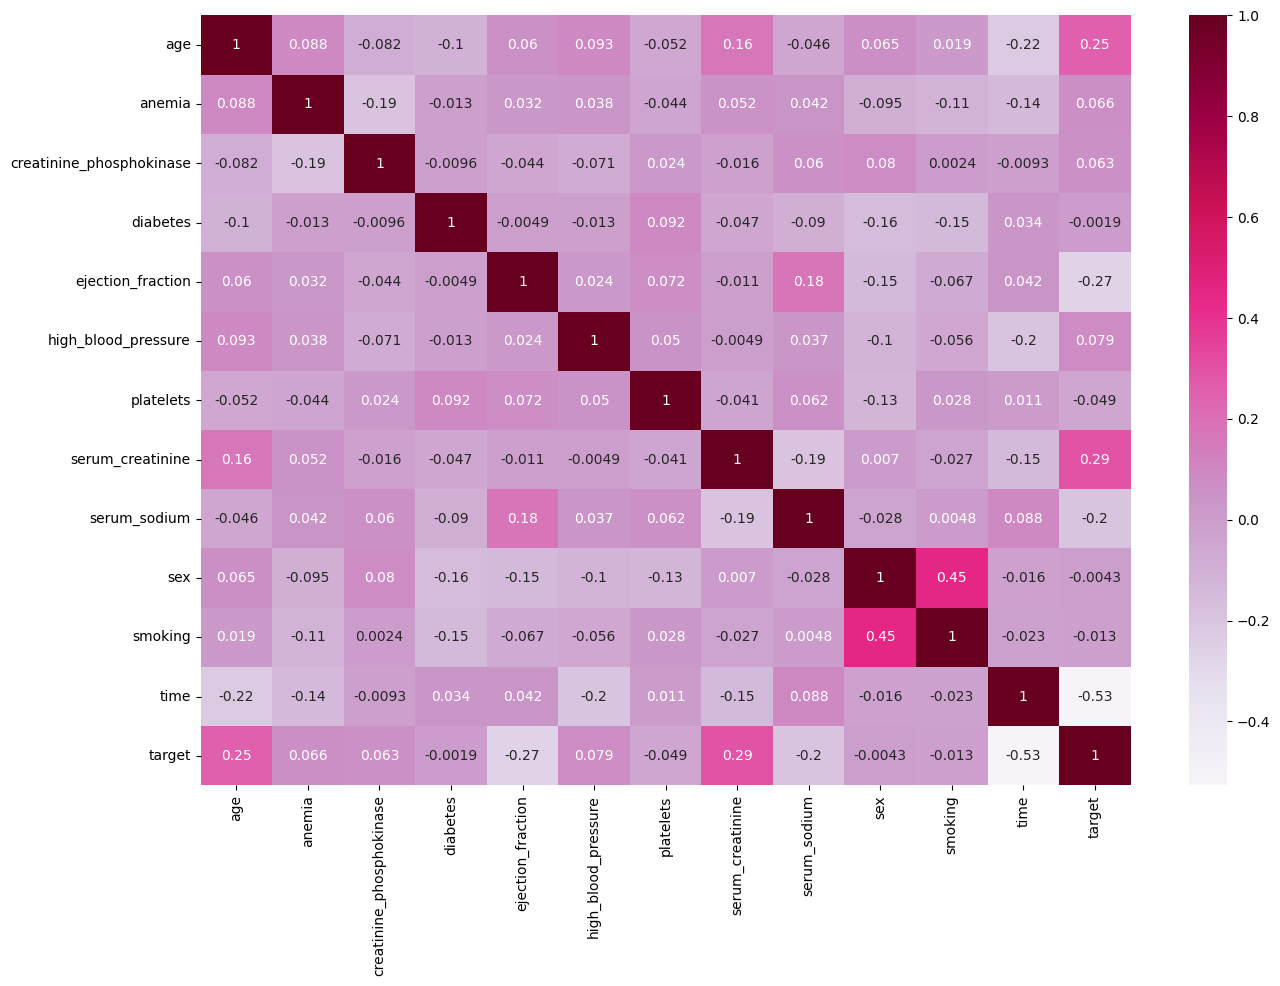

In [ ]:
plt.figure(figsize=(15, 10))
ax = sns.heatmap(df.corr(), annot=True, cmap="PuRd")

Cek kembali dengan df.corr() untuk melihat hasil dari fitur satu dengan fitur lainnya yang sama.

In [ ]:
df.corr()

,age,anemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,target
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


Berdasarkan plot di atas, diketahui bahwa semua fitur atau kolom dalam data memiliki korelasi atau hubungan yang cenderung rendah dengan kolom target.
 * Kolom age memiliki korelasi positif cenderung rendah yaitu sebesar 0.25. 
Artinya semakin tua umur pasien, maka risiko kematian akibat penyakit jantung semakin tinggi pula. 
 * Kolom ejection_fraction dan serum_sodium memiliki nilai koefisien korelasi yang negatif cenderung rendah dengan kolom target yaitu berturut-turut sebesar -0.27 dan -0.2. Berarti semakin rendah persentase darah yang keluar jantung dan level serum sodium, akan diikuti dengan tingginya risiko kematian akibat penyakit jantung.
 * Kolom serum_creatinne dengan kolom target memiliki koefisien korelasi positif yang cenderung rendah yaitu sebesar 0.29. Ini dapat diartikan bahwa semakin tinggi level serum creatinne dalam tubuh pasien, maka risiko kematian akibat penyakit jantung semakin tinggi pula. 
 * Kolom time memiliki koefisien korelasi negatif cenderung tinggi yaitu sebesar -0.53. Ini dapat diartikan bahwa semakin banyak hari untuk follow-up kondisi pasien, maka risiko kematian akan semakin rendah.
 * Untuk kolom atau fitur lain seperti anemia, creatinine_phosphokinase, diabetes, high_blood_pressure, platelets, sex, dan smoking tidak memiliki korelasi yang signifikan yaitu 0.00 dengan kolom target.

## **5.2 Statistik deskriptif dan distribusi masing-masing fitur/kolom**
Melihat beberapa rincian statistik masing-masing fitur/kolom.

In [ ]:
df.describe()

,age,anemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,target
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## **5.3 Memeriksa distribusi data menggunakan Histogram**

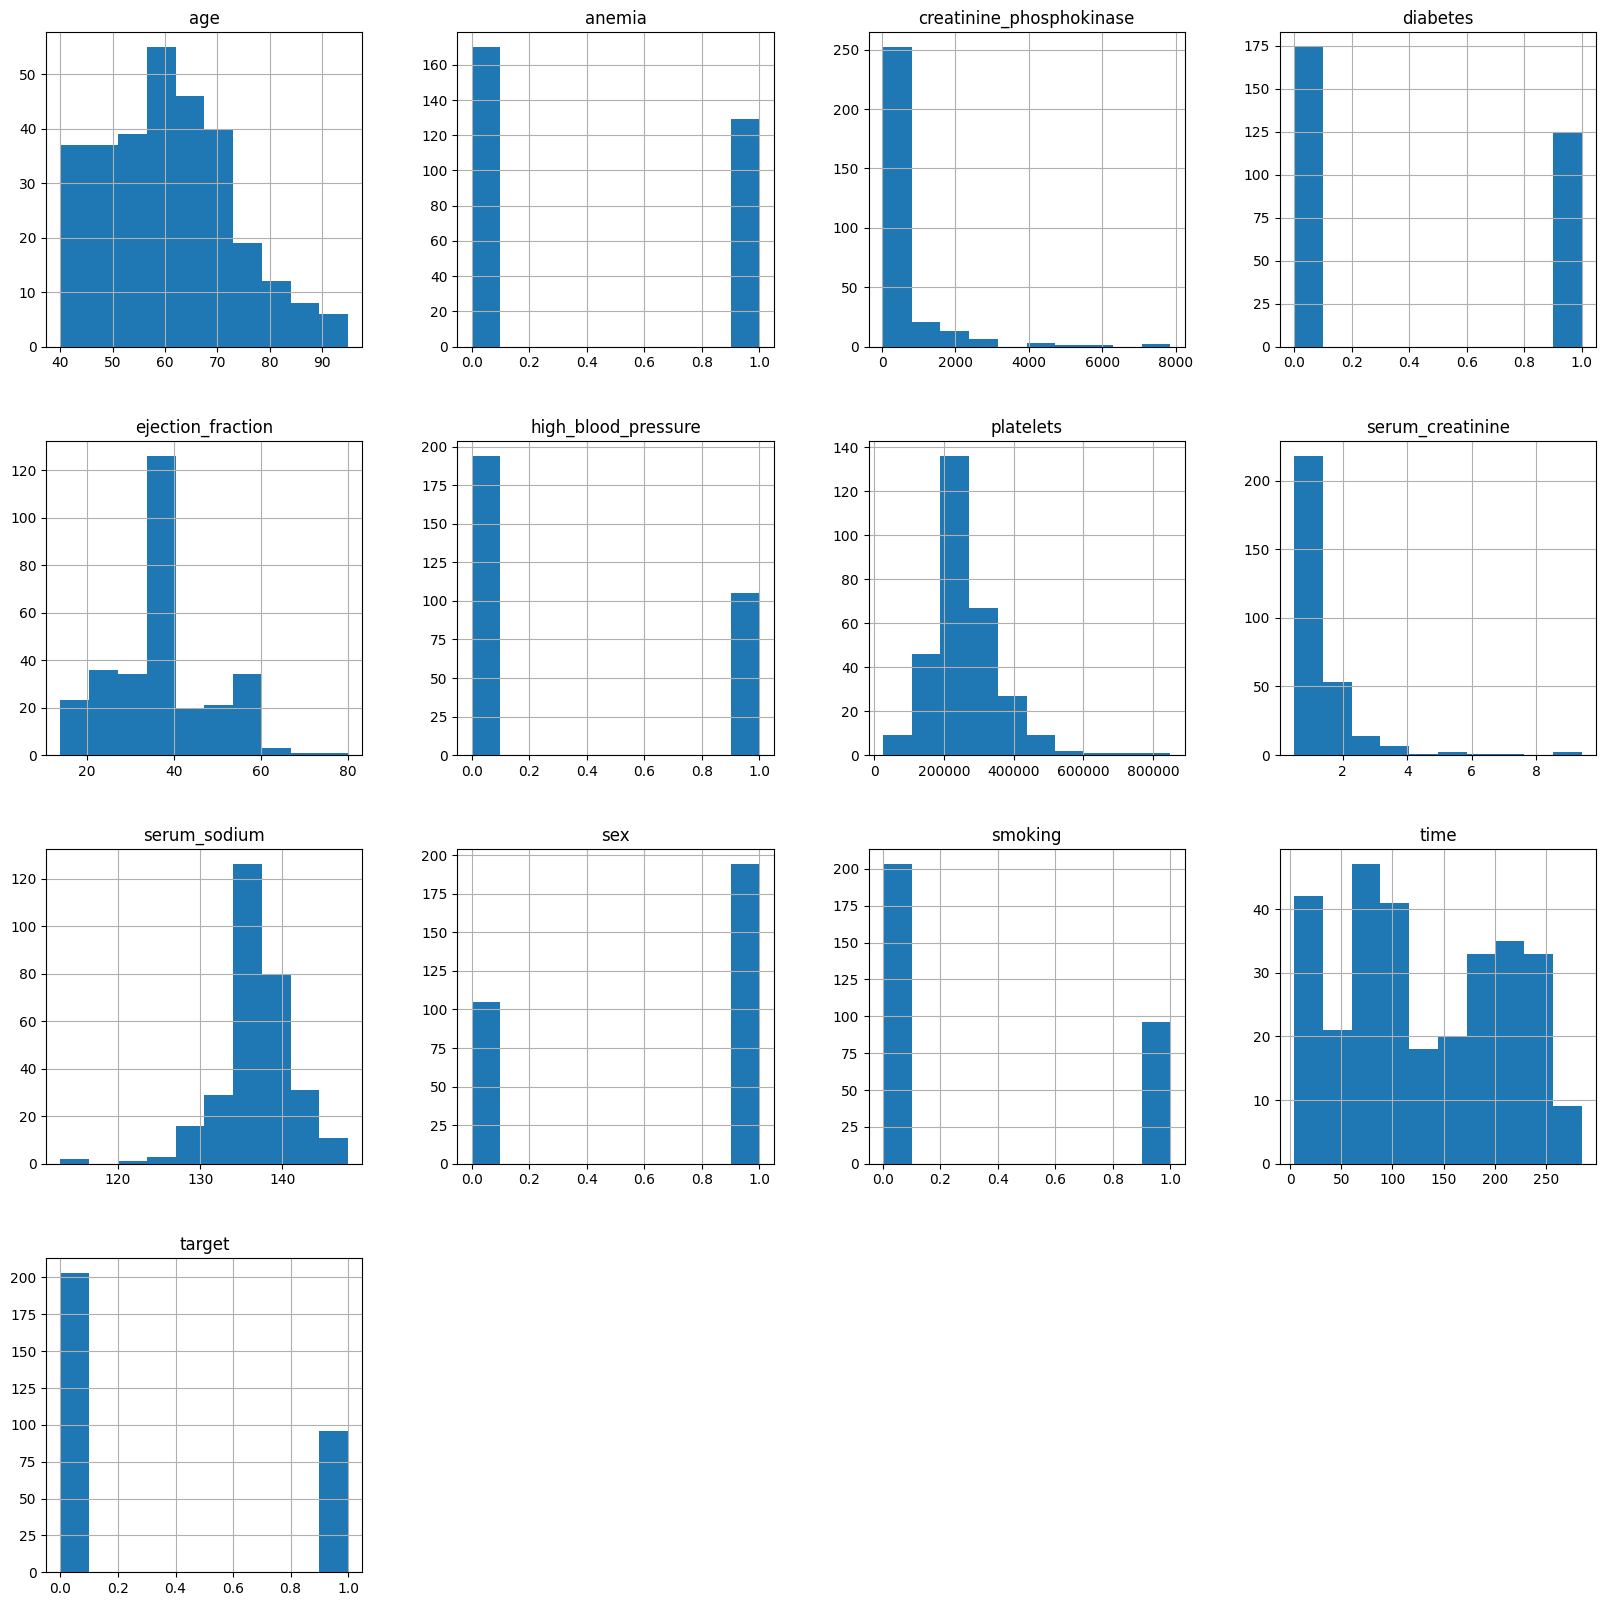

In [ ]:
df.hist(figsize=(20, 20))
plt.show()

Berdasarkan plot diatas, terlihat secara grafis bahwa hampir setiap variabel atau fitur tidak memiliki distribusi atau penyebaran yang normal. Selain itu, dapat dilihat berdasarkan plot distribusi juga umur pasien yang tercatat dalam data yang memiliki frekuensi tertinggi yaitu sekitar umur 55-65 tahun.

## **5.4 Menghitung kecondongan set data, yang menggambarkan simetri set data tersebut terhadap rata-ratanya**

In [ ]:
df.skew()

age                         0.423062
anemia                      0.278261
creatinine_phosphokinase    4.463110
diabetes                    0.333929
ejection_fraction           0.555383
high_blood_pressure         0.626732
platelets                   1.462321
serum_creatinine            4.455996
serum_sodium               -1.048136
sex                        -0.626732
smoking                     0.770349
time                        0.127803
target                      0.770349
dtype: float64

Berdasarkan hasil diatas, terlihat bahwa kolom creatinine_phosphokinase dan serum_creatinine memiliki nilai kemiringan atau skewness tertinggi. Artinya kedua kolom tersebut memiliki nilai modus dan median yang lebih rendah dibanding nilai rata-ratanya. Selain itu, kolom serum_sodium dan sex memiliki nilai kemiringan atau skewness negatif, yang artinya nilai modus dan median lebih tinggi dibanding nilai rata-ratanya.

## **5.5 Uji normalitas data**
Selanjutnya akan diperiksa apakah data terdistribusi dengan normal atau tidak.

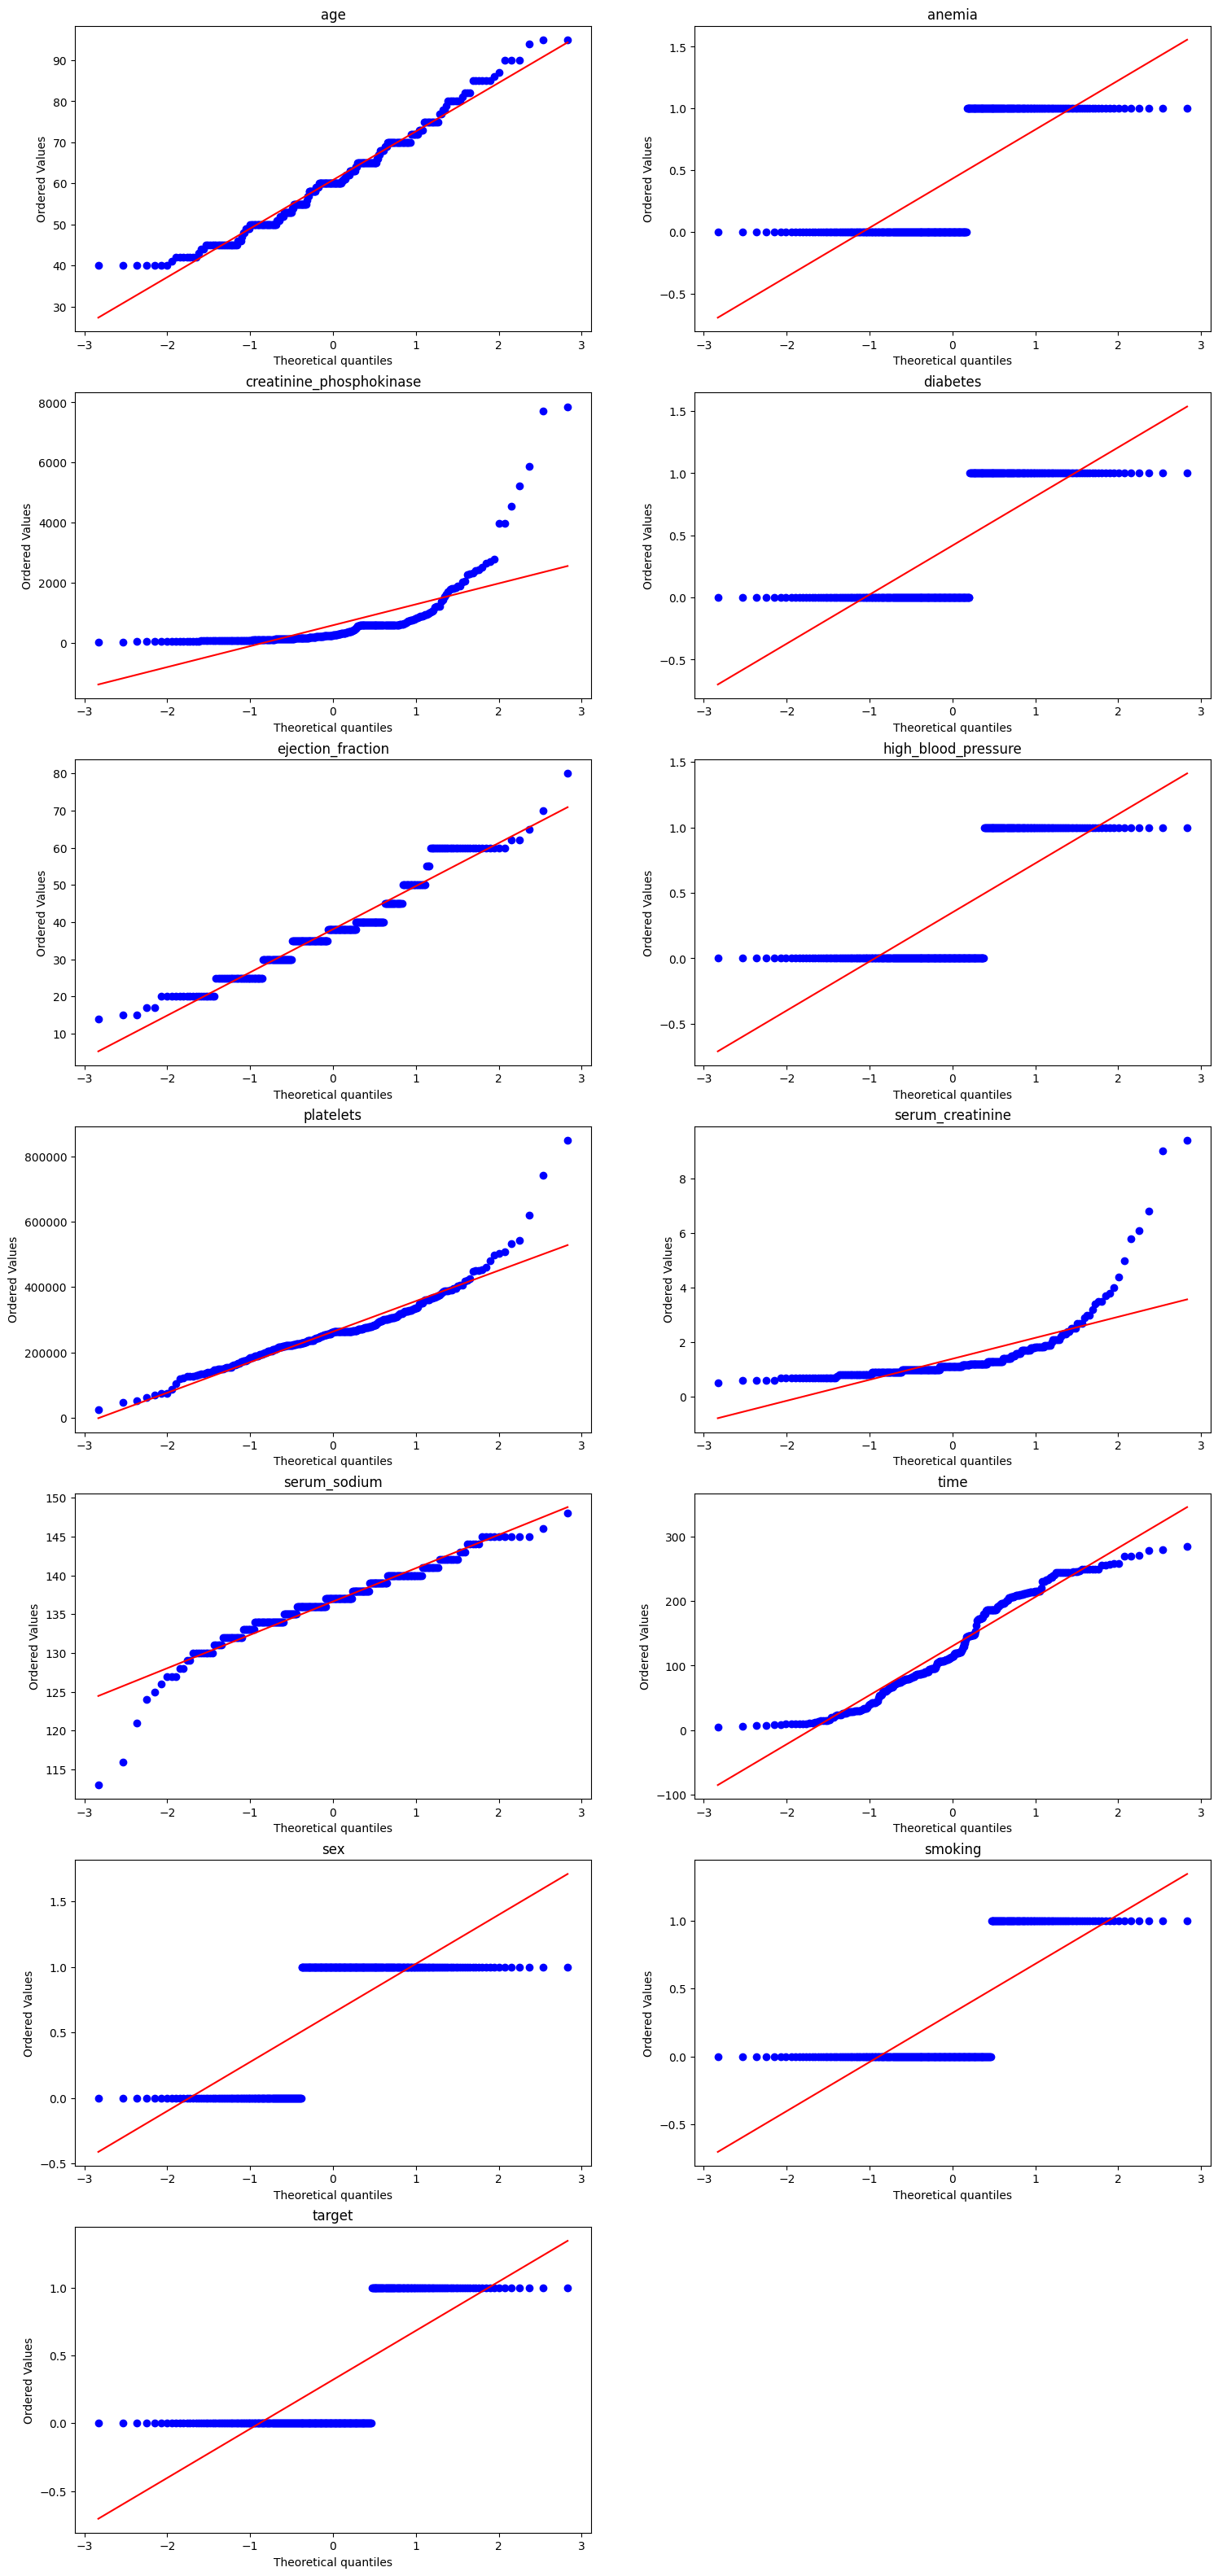

In [ ]:
# Variable names
columns = ["age", "anemia", "creatinine_phosphokinase", "diabetes", "ejection_fraction", "high_blood_pressure", "platelets", "serum_creatinine", "serum_sodium", "time", "sex", "smoking", "target"]

# Create the plot
plt.figure(figsize=(18, 40))

for i in range(1, 14):
    plt.subplot(7, 2, i)
    stats.probplot(df[columns[i-1]], dist="norm", plot=plt)
    plt.title(columns[i-1])

Berdasarkan plot diatas, dapat diketahu bahwa secara grafis, masing-masing kolom atau fitur memiliki titik menyebar diantara garis merah atau yang disebut dengan garis normal. Untuk kolom anemia, diabetes, high_blood_pressure, sex, smoking, dan target adalah kolom kategorik.

## **5.6 Distribusi umur pasien dengan risiko kematian**

Rata-rata usia pasien adalah 60.83


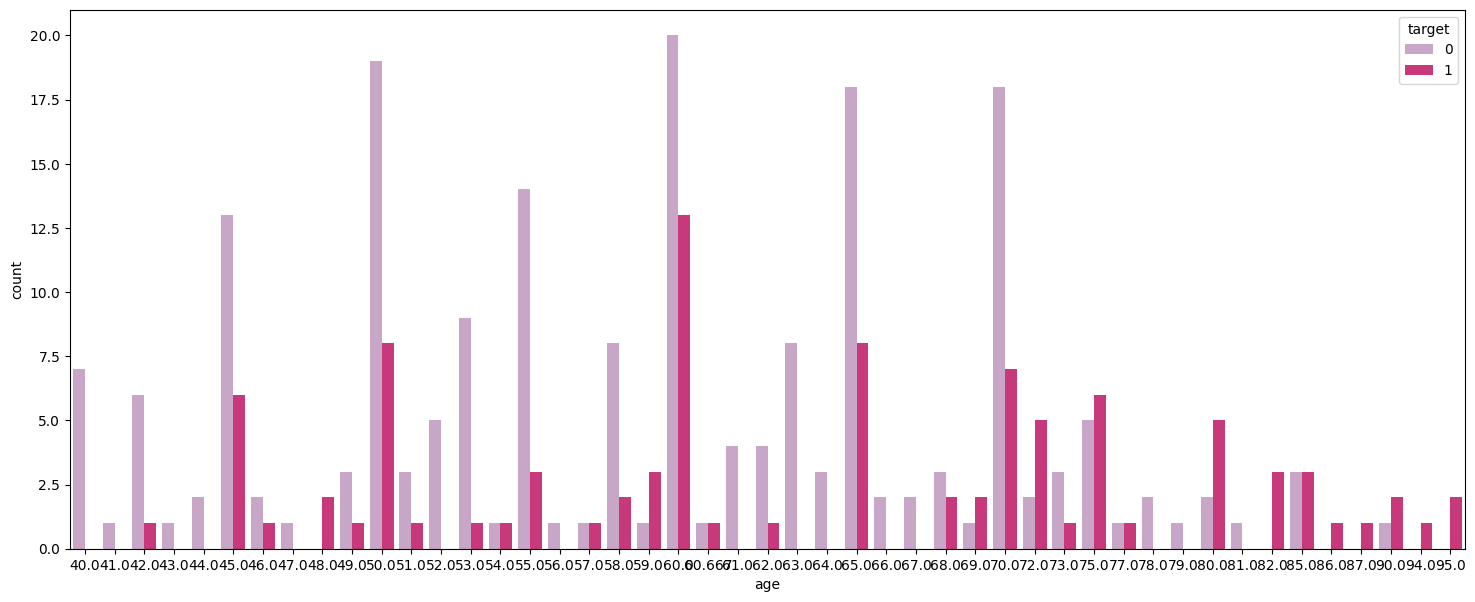

In [ ]:
plt.figure(figsize=(18,7))
ax = sns.countplot(x="age", hue="target", data=df, palette="PuRd")

mean_de = df["age"].mean()
print("Rata-rata usia pasien adalah {:.2f}".format(mean_de))

Berdasarkan plot diatas, dapat dilihat bahwa usia 60 tahun adalah usia yang memiliki risiko kematian akibat penyakit jantung paling tinggi. Selain itu, dapat dilihat juga bahwa umur pasien cenderung mempengaruhi ada tidaknya risiko kematian karena umur di bawah 45 tahun memiliki risiko kematian yang rendah sedangkan di atas 50 tahun memiliki risiko kematian yang lebih tinggi.

Jumlah pasien berumur di atas 50 tahun yang memiliki risiko kematian :- 85
Jumlah pasien berumur di atas 50 tahun yang tidak memiliki risiko kematian:- 167


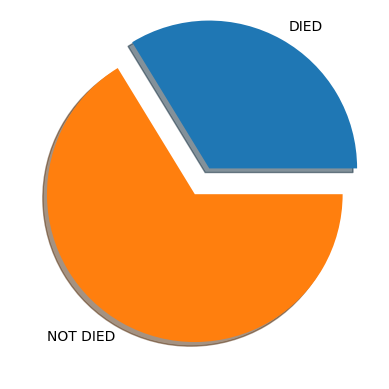

In [ ]:
age_above_50_not_died = df['target'][df.age >=50][df.target == 0]
age_above_50_died = df['target'][df.age >= 50][df.target == 1]

len_died = len(age_above_50_died)
len_not_died = len(age_above_50_not_died)

arr1 = np.array([len_died, len_not_died])
labels =['DIED','NOT DIED']

print(f'Jumlah pasien berumur di atas 50 tahun yang memiliki risiko kematian :- {len_died}')
print(f'Jumlah pasien berumur di atas 50 tahun yang tidak memiliki risiko kematian:- {len_not_died}')

plt.pie(arr1, labels=labels, explode = [0.2, 0.0], shadow= True)
plt.show()

Dapat dilihat juga berdasarkan pie-chart di atas bahwa pasien yang berumur di atas atau sama dengan 50 tahun yang memiliki risiko kematian dan yang tidak berisiko kematian memiliki perbandingan proporsi 1:2.

## **5.7 Distribusi jenis kelamin pasien dengan risiko kematian**

Jumlah pasien berjenis kelamin wanita: 105
Jumlah pasien berjenis kelamin pria: 194


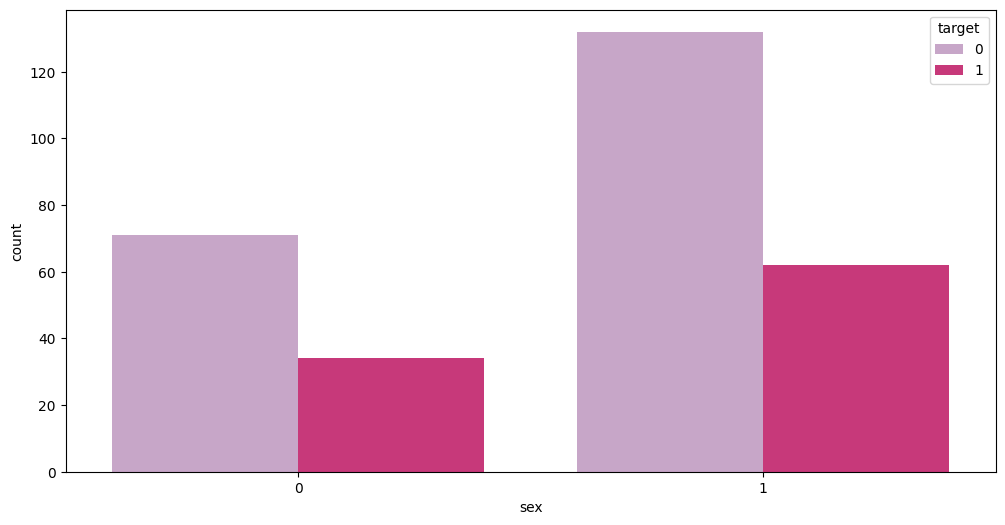

In [ ]:
female = df['target'][df.sex == 0]
male = df['target'][df.sex == 1]

len_f = len(female)
len_m = len(male)

print(f'Jumlah pasien berjenis kelamin wanita: {len_f}')
print(f'Jumlah pasien berjenis kelamin pria: {len_m}')

plt.figure(figsize=(12, 6))
ax = sns.countplot(x="sex", hue="target", data=df, palette="PuRd")

Berdasarkan plot diatas, dapat dilihat bahwa jumlah laki-laki (1) yang memiliki risiko kematian akibat penyakit jantung cenderung lebih banyak daripada wanita (0).

## **5.8 Distribusi kolom anemia, diabetes, high_blood_pressure, smoking, dan time berdasarkan risiko kematian**

<Axes: xlabel='time', ylabel='count'>

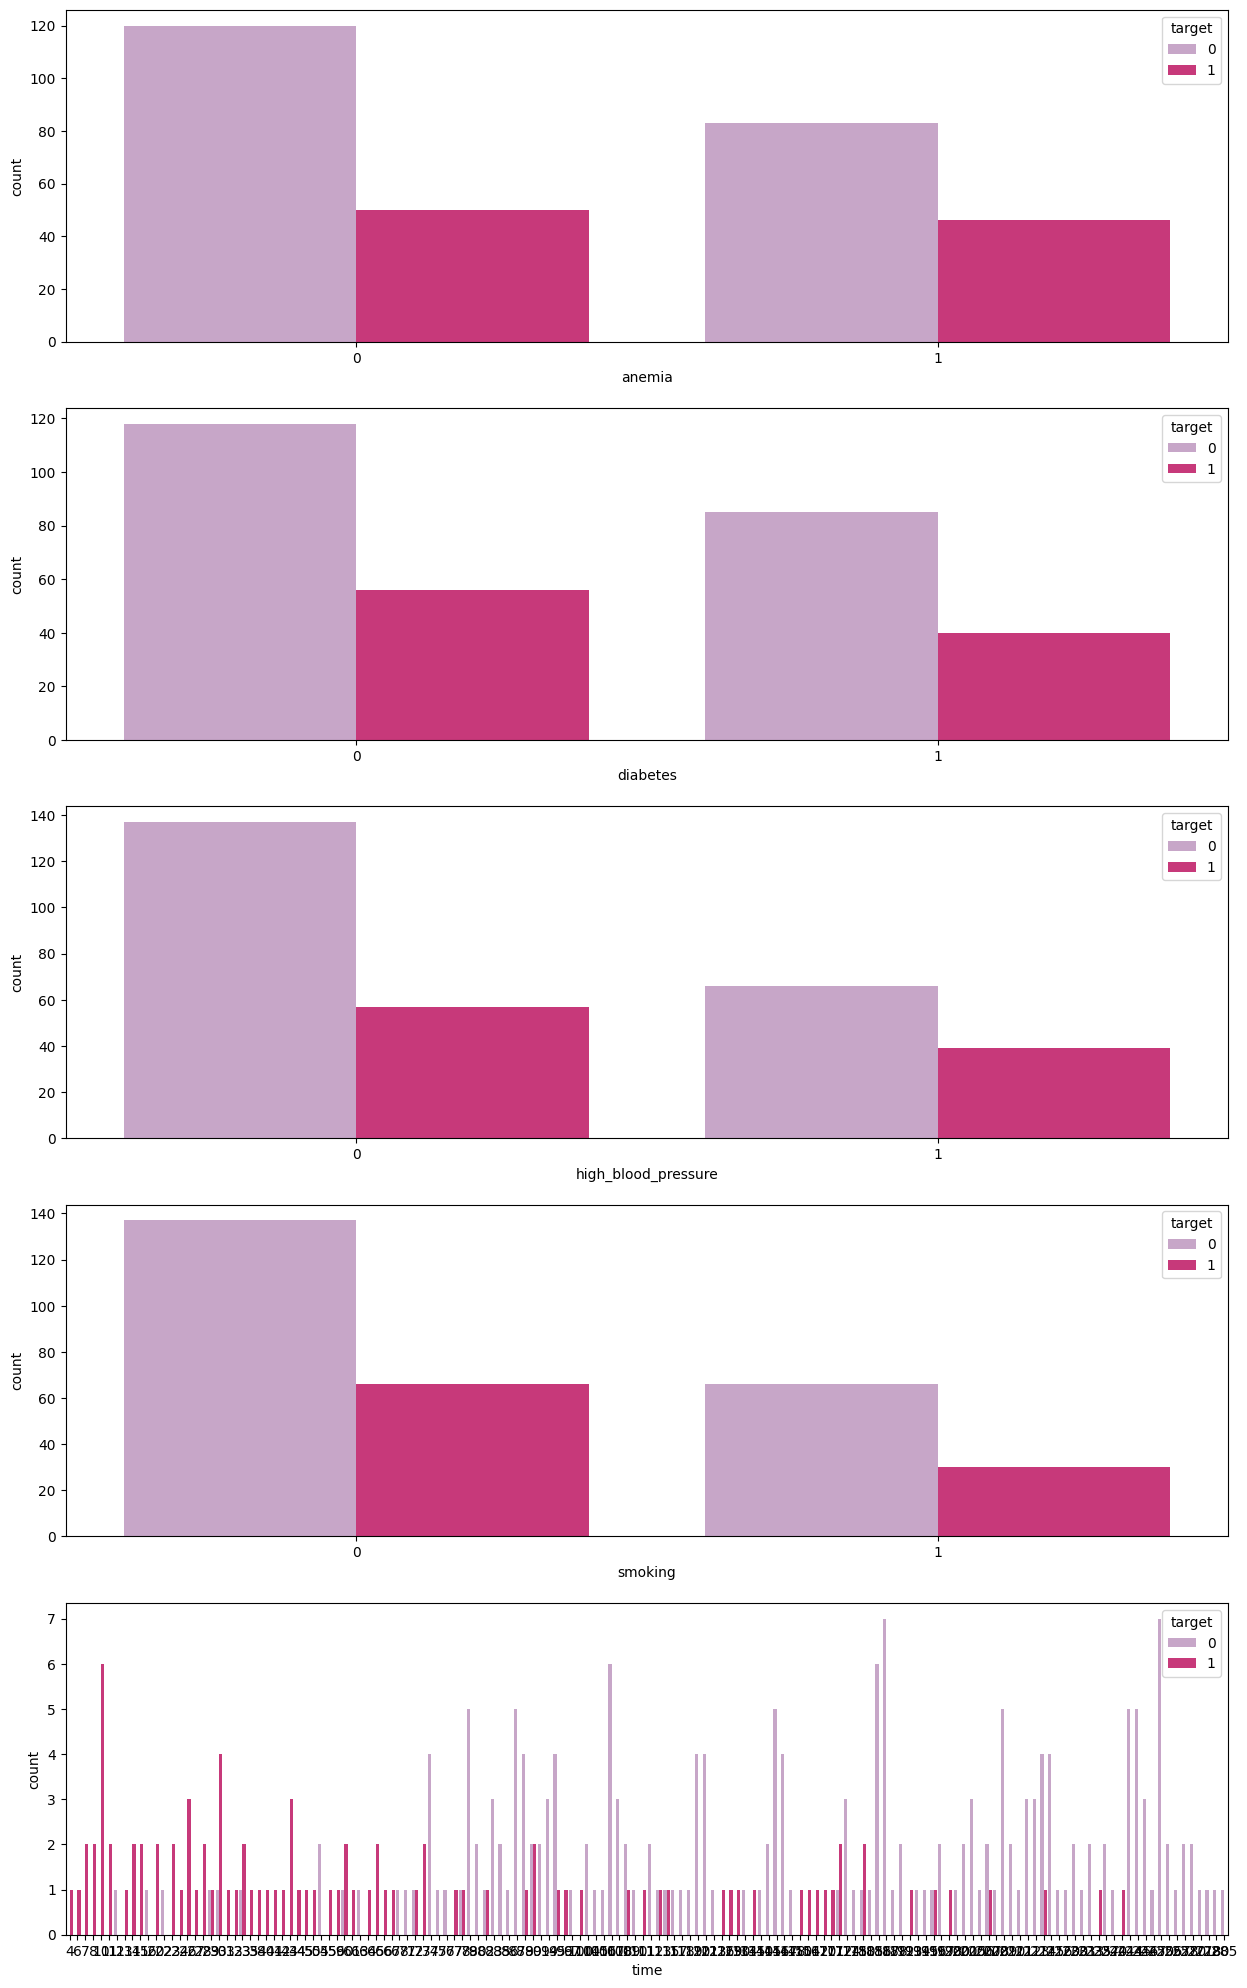

In [ ]:
fig = plt.figure(figsize=(15,25))

ax0 = fig.add_subplot(5,1,1)
ax1 = fig.add_subplot(5,1,2)
ax2 = fig.add_subplot(5,1,3)
ax3 = fig.add_subplot(5,1,4)
ax4 = fig.add_subplot(5,1,5)

sns.countplot(x="anemia", hue="target", data=df, palette="PuRd", ax=ax0)
sns.countplot(x="diabetes", hue="target", data=df, palette="PuRd", ax=ax1)
sns.countplot(x="high_blood_pressure", hue="target", data=df, palette="PuRd", ax=ax2)
sns.countplot(x="smoking", hue="target", data=df, palette="PuRd", ax=ax3)
sns.countplot(x="time", hue="target", data=df, palette="PuRd", ax=ax4)

Berdasarkan plot di atas, masing-masing kolom tidak menunjukkan adanya pengaruh yang signifikan terhadap risiko kematian akibat penyakit jantung, baik itu penderita anemia, diabetes, darah tinggi, dan perokok. Namun, untuk kolom time atau waktu follow-up pasien menunjukkan bahwa semakin sedikit waktu follow-up, maka risiko kematian akibat penyakit jantung semakin tinggi dikarenakan kurangnya kontrol kondisi kesehatan atau kondisi vital pasien.

# **6. Data Preprocessing**

In [ ]:
data = df.copy()

## **6.1 Memisahkan/memecah data**

In [ ]:
age = data["age"]
anemia = data["anemia"]
creatinine_phosphokinase = data["creatinine_phosphokinase"]
diabetes = data["diabetes"]
ejection_fraction = data["ejection_fraction"]
high_blood_pressure = data["high_blood_pressure"]
platelets = data["platelets"]
serum_creatinine = data["serum_creatinine"]
serum_sodium = data["serum_sodium"]
sex = data["sex"]
smoking = data["smoking"]
time = data["time"]
target = data["target"]

Visualisasi nilai statistik masing-masing kolom menggunakan boxplot.

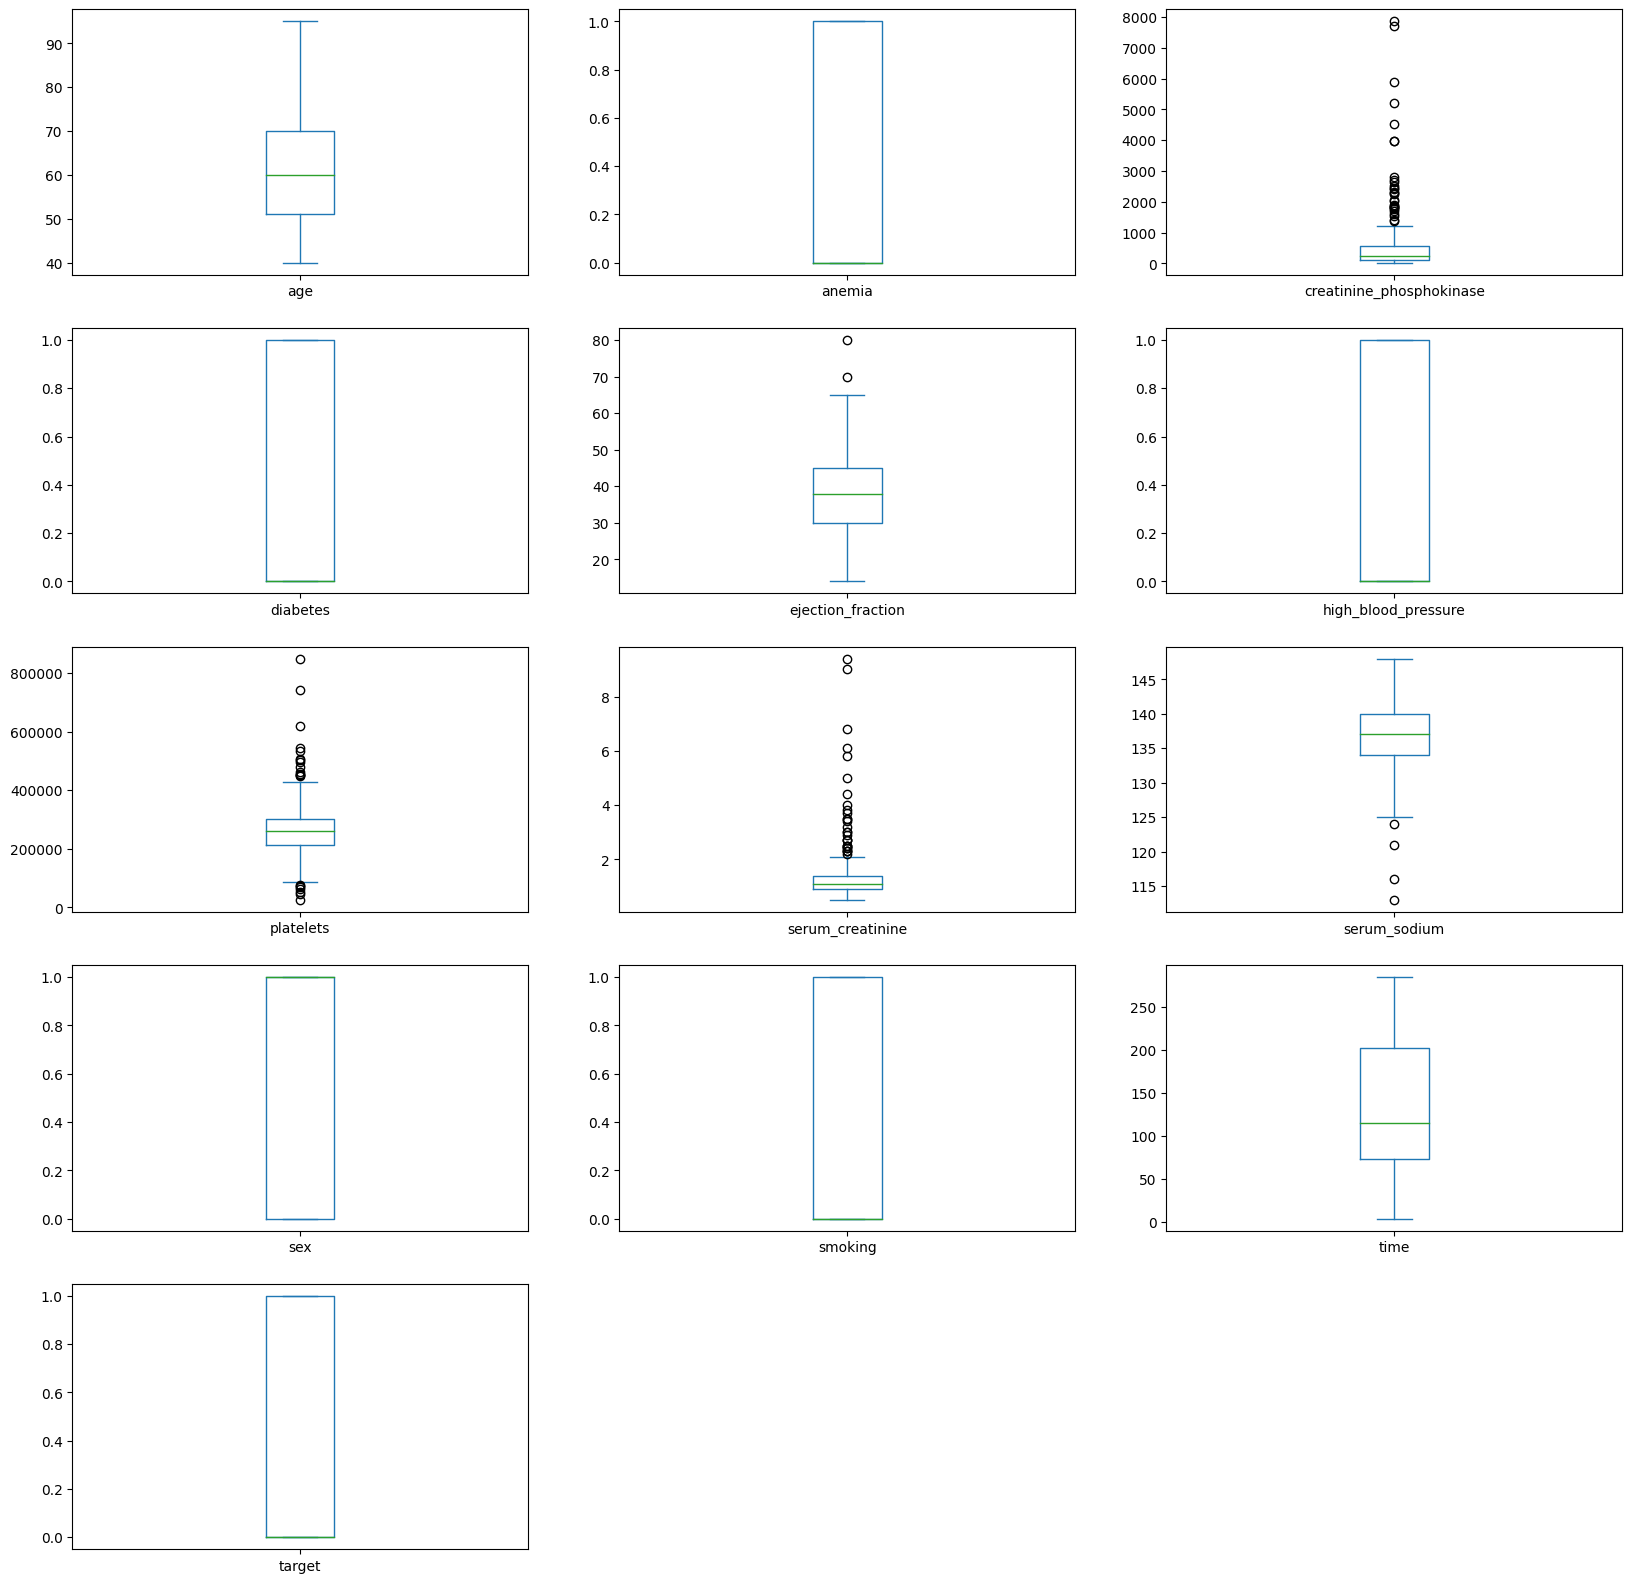

In [ ]:
fig = plt.figure(figsize=(20,20))

ax0 = fig.add_subplot(5,3,1)
ax1 = fig.add_subplot(5,3,2)
ax2 = fig.add_subplot(5,3,3)
ax3 = fig.add_subplot(5,3,4)
ax4 = fig.add_subplot(5,3,5)
ax5 = fig.add_subplot(5,3,6)
ax6 = fig.add_subplot(5,3,7)
ax7 = fig.add_subplot(5,3,8)
ax8 = fig.add_subplot(5,3,9)
ax9 = fig.add_subplot(5,3,10)
ax10 = fig.add_subplot(5,3,11)
ax11 = fig.add_subplot(5,3,12)
ax12 = fig.add_subplot(5,3,13)

age.plot(kind="box", ax=ax0)
anemia.plot(kind="box", ax=ax1)
creatinine_phosphokinase.plot(kind="box", ax=ax2)
diabetes.plot(kind="box", ax=ax3)
ejection_fraction.plot(kind="box", ax=ax4)
high_blood_pressure.plot(kind="box", ax=ax5)
platelets.plot(kind="box", ax=ax6)
serum_creatinine.plot(kind="box", ax=ax7)
serum_sodium.plot(kind="box", ax=ax8)
sex.plot(kind="box", ax=ax9)
smoking.plot(kind="box", ax=ax10)
time.plot(kind="box", ax=ax11)
target.plot(kind="box", ax=ax12)

plt.show()

## **6.2 Standarisasi data**

Standardisasi adalah proses mengubah data sedemikian rupa sehingga mean tiap variabel menjadi sama dengan nol, dan standard deviation tiap variabel adalah satu. Dengan begitu, akan didapatkan skala yang sama untuk semua variabel. Standarisasi juga dilakukan karena banyaknya outlier atau pecilan pada data.

In [ ]:
scaler = StandardScaler()

In [ ]:

scaler.fit(data.drop('target',axis = 1))
scaled_features = scaler.transform(data.drop('target',axis = 1))
df_feat = pd.DataFrame(scaled_features,columns = df.columns[:-1])
df_feat.head()

,age,anemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1.192945,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,0.735688,-0.687682,-1.629502
1,-0.491279,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682,-1.603691
2,0.350833,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,0.735688,1.454161,-1.590785
3,-0.912335,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,0.735688,-0.687682,-1.590785
4,0.350833,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,-1.359272,-0.687682,-1.577879


## **6.3 Membagi Data**
Membagi data training dan testing dengan rasio 80:20

In [ ]:
X = df_feat
y = data["target"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
print("Training set sebesar {0:0.2f}%".format(len(X_train)/len(df.index)*100))
print("Test set sebesar {0:0.2f}%".format(len(X_test)/len(df.index)*100))

Training set sebesar 69.90%
Test set sebesar 30.10%


In [ ]:
print('Jumlah training set:', len(X_train))
print('Jumlah testing set:', len(X_test))

Jumlah training set: 209
Jumlah testing set: 90


In [ ]:
print("Jumlah pasien berisiko kematian akibat penyakit jantung: {0} ({1:2.2f}%)".format(len(df.loc[df["target"] == 1]), (len(df.loc[df["target"]==1])/len(df.index))*100.0))
print("Jumlah pasien yang tidak berisiko kematian akibat penyakit Jantung: {0} ({1:2.2f}%)\n".format(len(df.loc[df["target"] == 0]), (len(df.loc[df["target"] == 0])/len(df.index))*100.0))

print("Training True: {0} ({1:2.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)*100.0)))
print("Training False: {0} ({1:2.2f}%)\n".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)*100.0)))

print("Testing True: {0} ({1:2.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)*100.0)))
print("Testing False: {0} ({1:2.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)*100.0)))

Jumlah pasien berisiko kematian akibat penyakit jantung: 96 (32.11%)
Jumlah pasien yang tidak berisiko kematian akibat penyakit Jantung: 203 (67.89%)

Training True: 68 (32.54%)
Training False: 141 (67.46%)

Testing True: 28 (31.11%)
Testing False: 62 (68.89%)


In [ ]:
# import library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

# **7. Pendefinisian Model**

## **7.1 Logistic Regression**

In [ ]:
model_lr = LogisticRegression()
model_lr

LogisticRegression()

## **7.2 K-Nearest Neighbors**

In [ ]:
model_knn = KNeighborsClassifier()

## **7.3 Support Vector Machine**

In [ ]:
model_svm = SVC()
model_svm

SVC()

## **7.4 Decision Tree**

In [ ]:
model_tree = DecisionTreeClassifier()
model_tree

DecisionTreeClassifier()

## **7.5 Random Forest**

In [ ]:
model_rf = RandomForestClassifier(n_estimators=200)
model_rf

RandomForestClassifier(n_estimators=200)

## **7.6 Naive Bayes**

In [ ]:
model_nb = GaussianNB()
model_nb

GaussianNB()

# **8. Pelatihan Model**

## **8.1 Logistic Regression**

In [ ]:
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

## **8.2 K-Nearest Neighbors**

In [ ]:
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

## **8.3 Support Vector Machine**

In [ ]:
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)

## **8.4 Decision Tree**

In [ ]:
model_tree.fit(X_train, y_train)
y_pred_tree = model_tree.predict(X_test)

## **8.4 Random Forest**

In [ ]:
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

## **8.5 Naive Bayes**

In [ ]:
model_nb.fit(X_train, y_train)
y_pred_nb = model_nb.predict(X_test)

## **9. EVALUASI MODEL**

## **9.1 Logistic Regression**

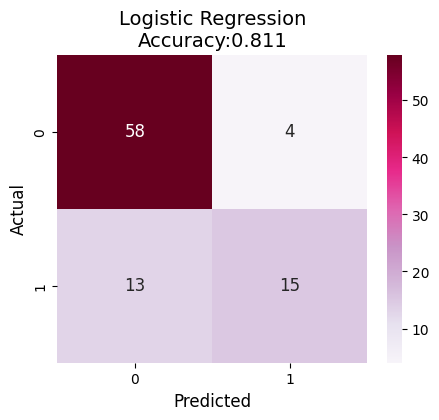

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.94      0.87        62
           1       0.79      0.54      0.64        28

    accuracy                           0.81        90
   macro avg       0.80      0.74      0.76        90
weighted avg       0.81      0.81      0.80        90

Accuracy Score:- 0.8111111111111111
Precision Score:- 0.7894736842105263
Recall Score:- 0.5357142857142857


In [ ]:
# Create a confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("Logistic Regression\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_lr)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

print(f'Accuracy Score:- {accuracy_score(y_test, y_pred_lr)}')
print(f'Precision Score:- {precision_score(y_test,y_pred_lr)}')
print(f'Recall Score:- {recall_score(y_test,y_pred_lr)}')

## **9.2 K-Nearest Neighbors**

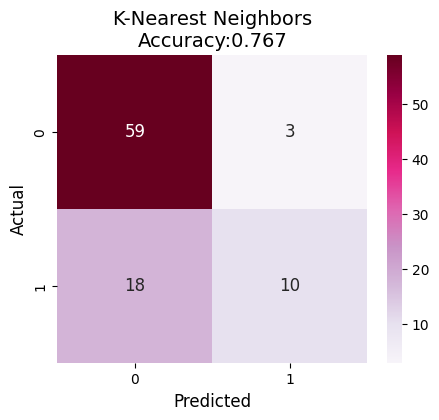

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.95      0.85        62
           1       0.77      0.36      0.49        28

    accuracy                           0.77        90
   macro avg       0.77      0.65      0.67        90
weighted avg       0.77      0.77      0.74        90

Accuracy Score:- 0.7666666666666667
Precision Score:- 0.7692307692307693
Recall Score:- 0.35714285714285715


In [ ]:
# Create a confusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("K-Nearest Neighbors\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_knn)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

print(f'Accuracy Score:- {accuracy_score(y_test, y_pred_knn)}')
print(f'Precision Score:- {precision_score(y_test,y_pred_knn)}')
print(f'Recall Score:- {recall_score(y_test,y_pred_knn)}')

## **9.2 Support Vector Machine**

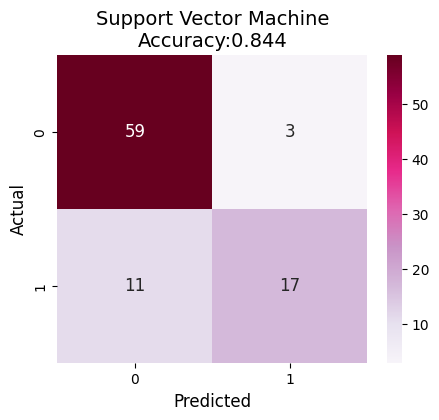

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89        62
           1       0.85      0.61      0.71        28

    accuracy                           0.84        90
   macro avg       0.85      0.78      0.80        90
weighted avg       0.85      0.84      0.84        90

Accuracy Score:- 0.8444444444444444
Precision Score:- 0.85
Recall Score:- 0.6071428571428571


In [ ]:
# Create a confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("Support Vector Machine\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_svm)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

print(f'Accuracy Score:- {accuracy_score(y_test, y_pred_svm)}')
print(f'Precision Score:- {precision_score(y_test,y_pred_svm)}')
print(f'Recall Score:- {recall_score(y_test,y_pred_svm)}')

## **9.3 Decision Tree**

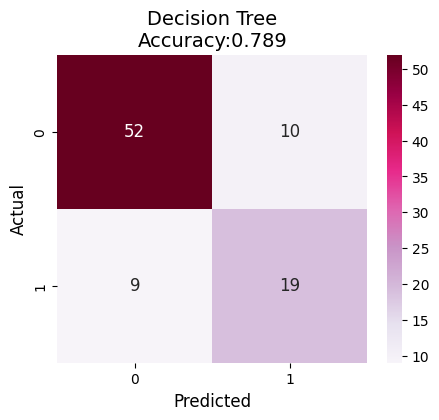

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85        62
           1       0.66      0.68      0.67        28

    accuracy                           0.79        90
   macro avg       0.75      0.76      0.76        90
weighted avg       0.79      0.79      0.79        90

Accuracy Score:- 0.7888888888888889
Precision Score:- 0.6551724137931034
Recall Score:- 0.6785714285714286


In [ ]:
# Create a confusion Matrix
cm = confusion_matrix(y_test, y_pred_tree)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("Decision Tree\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_tree)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred_tree))

print(f'Accuracy Score:- {accuracy_score(y_test, y_pred_tree)}')
print(f'Precision Score:- {precision_score(y_test,y_pred_tree)}')
print(f'Recall Score:- {recall_score(y_test,y_pred_tree)}')

## **9.4 Random Forest**

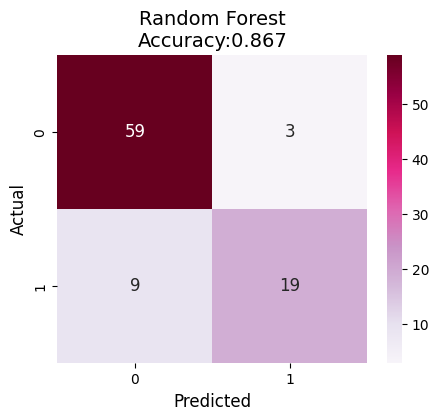

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91        62
           1       0.86      0.68      0.76        28

    accuracy                           0.87        90
   macro avg       0.87      0.82      0.83        90
weighted avg       0.87      0.87      0.86        90

Accuracy Score:- 0.8666666666666667
Precision Score:- 0.8636363636363636
Recall Score:- 0.6785714285714286


In [ ]:
# Create a confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("Random Forest\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_rf)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

print(f'Accuracy Score:- {accuracy_score(y_test, y_pred_rf)}')
print(f'Precision Score:- {precision_score(y_test,y_pred_rf)}')
print(f'Recall Score:- {recall_score(y_test,y_pred_rf)}')

## **9.4 Naive Bayes**

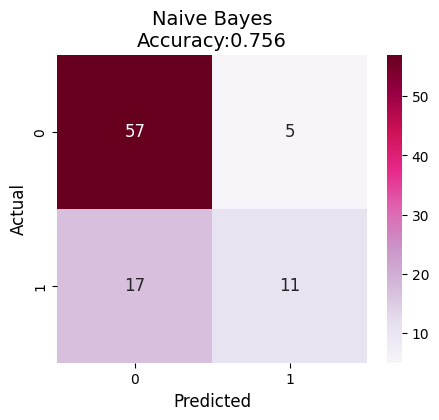

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.92      0.84        62
           1       0.69      0.39      0.50        28

    accuracy                           0.76        90
   macro avg       0.73      0.66      0.67        90
weighted avg       0.74      0.76      0.73        90

Accuracy Score:- 0.7555555555555555
Precision Score:- 0.6875
Recall Score:- 0.39285714285714285


In [ ]:
# Create a confusion Matrix
cm = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("Naive Bayes\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_nb)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

print(f'Accuracy Score:- {accuracy_score(y_test, y_pred_nb)}')
print(f'Precision Score:- {precision_score(y_test,y_pred_nb)}')
print(f'Recall Score:- {recall_score(y_test,y_pred_nb)}')


Dari model yang telah dibuat berdasarkan macam-macam algoritma klasifikasi, bahwa algoritma klasifikasi Random Forest memiliki performa model yang paling baik diantara algoritma klasifikasi yang lain. Algoritma Random Forest memiliki nilai akurasi sebesar 85%, nilai precision sebesar 0.86, recall sebesar 0.64, dan f1-score sebesar 0.73.

## **9.5 Feature Importance**

Setelah mendapatkan model prediksi klasifikasi terbaik, akan dicek feature importance dari data, yaitu mengetahui fitur/kolom mana saja yang paling berpengaruh untuk menentukan prediksi target.

In [ ]:
data2 = data.copy()
data2.drop("target", axis=1, inplace=True)
feature_names = list(data2.columns.values)

In [ ]:
feature_imp = pd.Series(model_rf.feature_importances_, index=feature_names).sort_values(ascending=False)
feature_imp

time                        0.327136
ejection_fraction           0.134579
serum_creatinine            0.121499
age                         0.101118
creatinine_phosphokinase    0.085348
platelets                   0.084222
serum_sodium                0.078080
anemia                      0.015974
sex                         0.013472
diabetes                    0.013353
high_blood_pressure         0.013146
smoking                     0.012074
dtype: float64

Pada algoritma RandomForestClassifier, terdapat perhitungan untuk mengukur feature importances. Dapat dilihat bahwa 3 variabel yang memiliki nilai feature importance paling tinggi yaitu time, serum_creatinie, ejection_fraction.

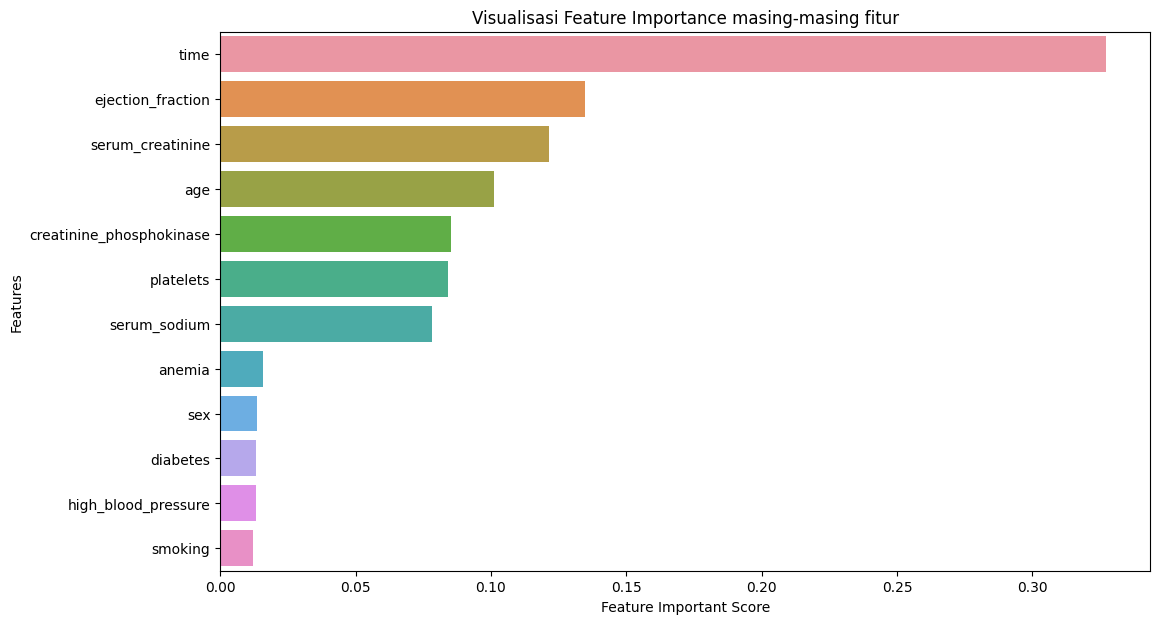

In [ ]:
plt.figure(figsize=(12, 7))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("Feature Important Score")
plt.ylabel("Features")
plt.title("Visualisasi Feature Importance masing-masing fitur")

plt.show()



Memilih variabel atau kolom dengan feature importance score tertinggi.

In [ ]:
data2 = data2.drop(['anemia','sex','diabetes','high_blood_pressure','smoking'], axis=1)
data2

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,75.0,582,20,265000.00,1.9,130,4
1,55.0,7861,38,263358.03,1.1,136,6
2,65.0,146,20,162000.00,1.3,129,7
3,50.0,111,20,210000.00,1.9,137,7
4,65.0,160,20,327000.00,2.7,116,8
...,...,...,...,...,...,...,...
294,62.0,61,38,155000.00,1.1,143,270
295,55.0,1820,38,270000.00,1.2,139,271
296,45.0,2060,60,742000.00,0.8,138,278
297,45.0,2413,38,140000.00,1.4,140,280


In [ ]:
scaler_ = StandardScaler()
scaled_features_ = scaler_.fit_transform(data2)
df_feat_ = pd.DataFrame(scaled_features_, columns = data2.columns)
df_feat_.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,-1.629502
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,-1.603691
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,-1.590785
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,-1.590785
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,-1.577879


In [ ]:
X_ = df_feat_
y_ = data["target"]

In [ ]:
# Membagi data testing dan data training
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size=0.3, random_state=0)

In [ ]:
# Pendefinisan model
model_rf_2 = RandomForestClassifier(n_estimators=100, random_state=0)

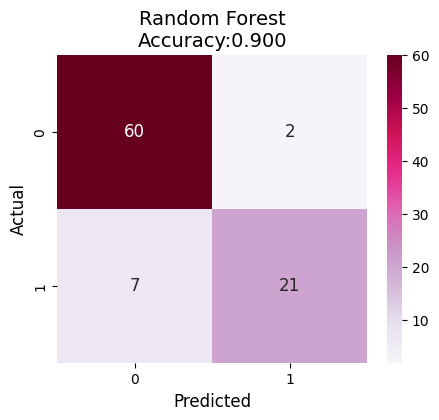

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93        62
           1       0.91      0.75      0.82        28

    accuracy                           0.90        90
   macro avg       0.90      0.86      0.88        90
weighted avg       0.90      0.90      0.90        90



In [ ]:
# Melatih data
model_rf_2.fit(X_train_, y_train_)
y_pred_rf_ = model_rf_2.predict(X_test_)

# Confusion Matrix
cm = confusion_matrix(y_test_, y_pred_rf_)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("Random Forest\nAccuracy:{:.3f}".format(accuracy_score(y_test_, y_pred_rf_)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test_, y_pred_rf_))

In [ ]:
accuracy_score(y_test, y_pred_rf_)

0.9

Berdasarkan output di atas, didapat bahwa algoritma terbaik adalah Random Forest dan setelah dilakukan pengecekan feature importance dengan menambahkan parameter random_state pada model Random Forest didapat nilai akurasi akhir sebesar 90%, nilai precision sebesar 0.91, recall sebesa 0.75, dan f1-score sebesar 0.82.